In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [3]:
data['Experience'] = np.where(data['Experience'] <0, 1, data['Experience'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.130000,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.422626,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


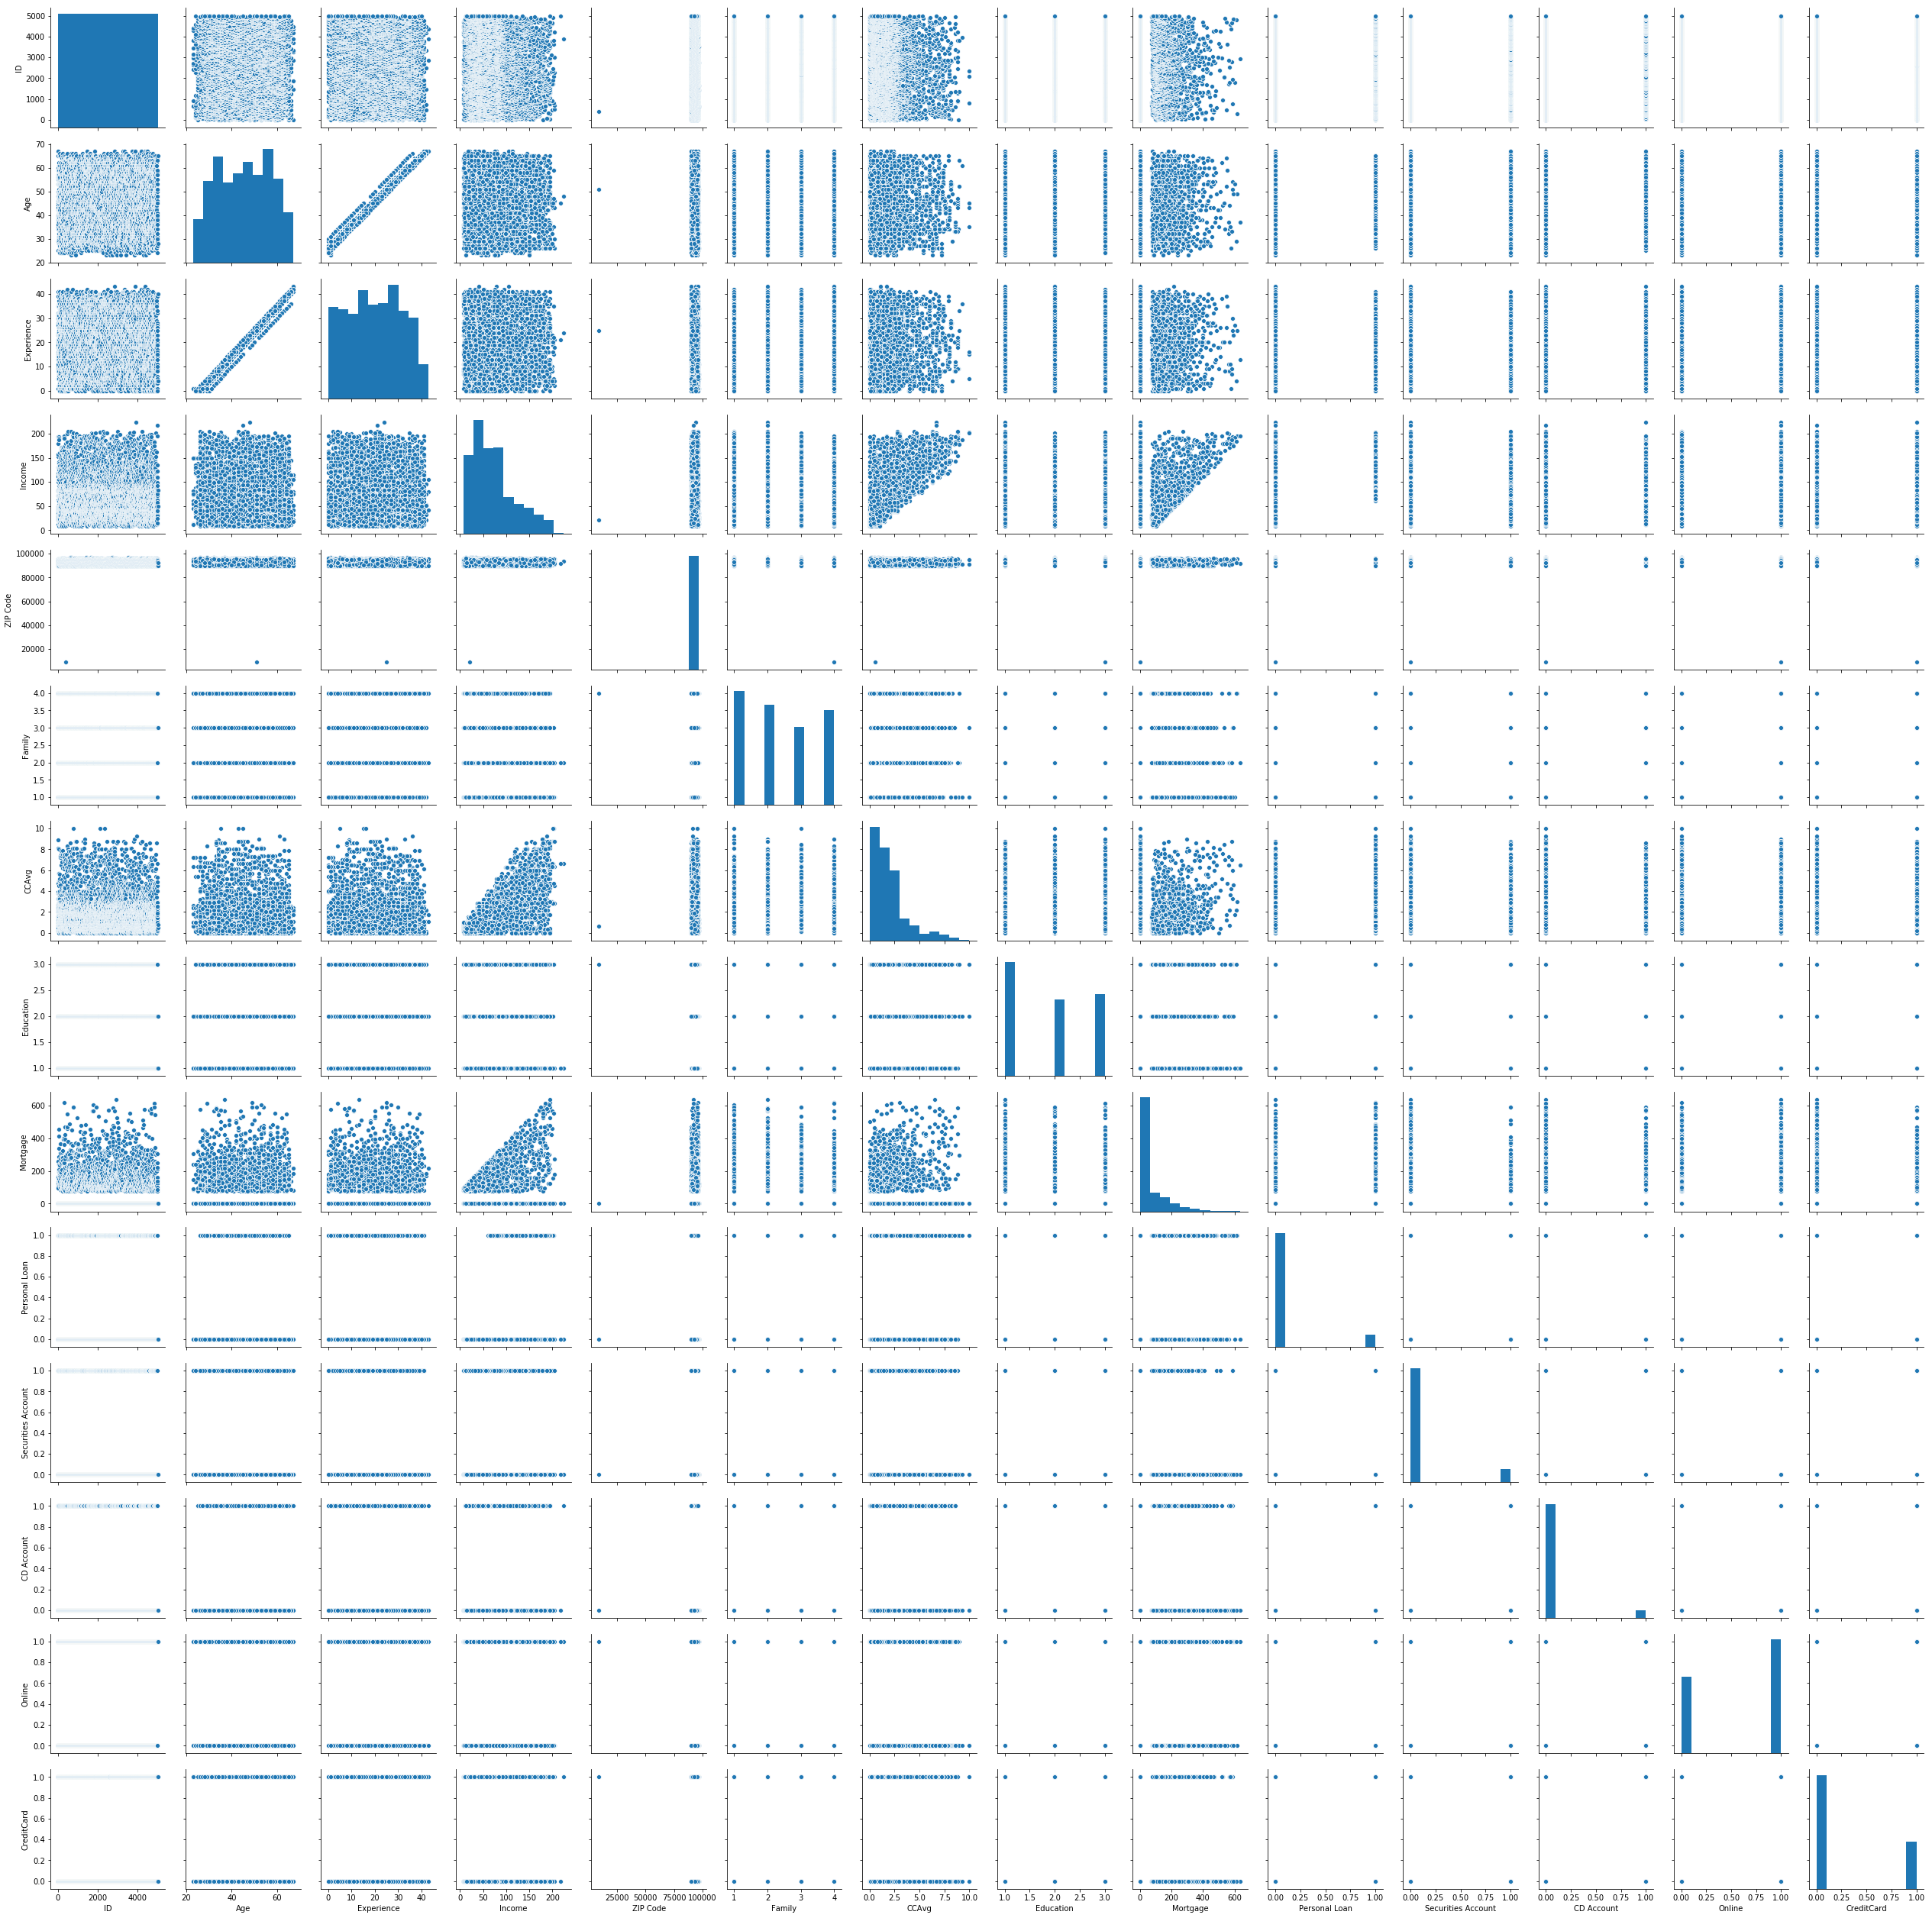

In [6]:
sns.pairplot(data)

In [7]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008324,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994098,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008324,0.994098,1.000000,-0.046878,-0.028790,-0.051922,-0.049891,0.013769,-0.010972,-0.008167,-0.001080,0.009831,0.013960,0.008913
Income,-0.017695,-0.055269,-0.046878,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028790,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051922,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049891,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013769,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010972,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008167,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


# Question2
## Study the data distribution in each attribute, share your findings.

Understanding of each attribute or feature in the given data
There are 5000 records with 14 attributes/features.

ID : Customer ID doesn't add any significant information & it's a redundant attribute. There is no association/correlation between Customer ID & Personal Loan (Target Variable). We can safely ignore this attribute for model prediction.

Age : Customer Age will have impact on the Personal Loan amount.

Experience : Professional experience of a customer will also have an impact on the Personal Loan amount.

Income : Personal Loan amount offered will be directly proportional to Income of a customer.

ZIP Code : From the given dataset, not much inference can be drawn from the Home Address ZIP code. It's difficult to correlate ZIP Code & Personal Loan from the given dataset. If we had another (external) dataset to map ZIP code with cities or states, we could have drawn some inference.

So in our model building we can drop the ZIP Code feature.

Family : Family size may impact Personal Loan. We can include this feature.

CCAvg : Average spending on credit cards may also impact Personal Loan. We can include this feature.

Education : Higher education of a customer may yield higher Income, thus Education may have affect the Personal Loan amount.

Mortage, Securities Account, CD Account, Online, CreditCard : These attributes may also affect Personal Loan feature, but only the detailed study of data distribution in each attribute will reveal something.

Personal Loan : Did this customer accept the personal loan offered in the last campaign? This is our target variable

### Split the data into training and test set in the ratio of 70:30 respectively

In [8]:
X = data.drop(['ID', 'Online', 'Personal Loan'], axis = 1)
y = data[['Personal Loan']]

#### Get the target column distribution.  Y=Personal Loan

In [9]:
array = data.values  
test_size = 0.3
seed = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Logistic Regression

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1362
           1       0.48      0.28      0.35       138

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.70      0.63      0.65      1500
weighted avg       0.89      0.91      0.89      1500



In [12]:
print("confusion_matrix using LogisticRegression")
print(confusion_matrix(y_test, y_predict))
print("Accuracy using LogisticRegression:",metrics.accuracy_score(y_test, y_predict))
print("Precision using LogisticRegression:",metrics.precision_score(y_test, y_predict))

confusion_matrix using LogisticRegression
[[1319   43]
 [  99   39]]
Accuracy using LogisticRegression: 0.9053333333333333
Precision using LogisticRegression: 0.47560975609756095


This model is 90% accuracy. Accepted Model.

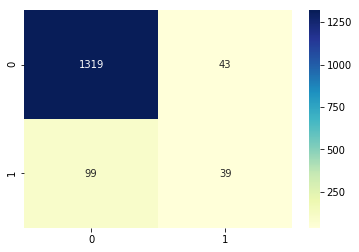

In [13]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict)), annot=True, cmap="YlGnBu" ,fmt='g')

# Naive Bayes

In [14]:
model_Bayes = GaussianNB()
model_Bayes.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
expected = y_test
predicted = model_Bayes.predict(X_test)
print("confusion_matrix using Naive Bayes\n" ,confusion_matrix(y_test, predicted))

confusion_matrix using Naive Bayes
 [[1267   95]
 [  66   72]]


In [25]:
print("Accuracy using Naive:",metrics.accuracy_score(y_test, predicted))
print("Precision using Naive:",metrics.precision_score(y_test, predicted))

Classification Report using Naive
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1362
           1       0.43      0.52      0.47       138

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.69      0.73      0.71      1500
weighted avg       0.90      0.89      0.90      1500

Accuracy using Naive: 0.8926666666666667
Precision using Naive: 0.4311377245508982


In [28]:
print("Classification Report using Naive")
print(classification_report(expected, predicted))

Classification Report using Naive
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1362
           1       0.43      0.52      0.47       138

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.69      0.73      0.71      1500
weighted avg       0.90      0.89      0.90      1500



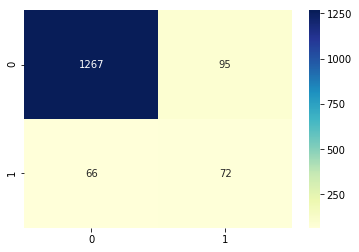

In [17]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predicted)), annot=True, cmap="YlGnBu" ,fmt='g')

# KNN Algorithm

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
print("Confusion Matrix using KNN: K=7")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix using KNN: K=7
[[1320   42]
 [ 108   30]]


In [21]:
print("Classification Report:",)
print (classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1362
           1       0.42      0.22      0.29       138

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.67      0.59      0.62      1500
weighted avg       0.88      0.90      0.89      1500



In [22]:
print("Accuracy using KNN:",metrics.accuracy_score(y_test,y_pred))

Accuracy using KNN: 0.9


# Print the confusion matrix for all the above models 

#### Accuracy using KNN: 0.9
#### Accuracy using Naive: 0.8927
#### Accuracy using LogisticRegression: 0.90534

### Accuracy of the LogisticRegression and KNN is almost same i,e 0.90 or 90% accurate. 